In [1]:
# !apt-get update && apt-get install -y graphviz 

In [2]:
import time

start = time.time()

In [3]:
import os
import logging
from pytz import timezone
from datetime import datetime

from helpers.log_helper import LogHelper
from helpers.dir_utils import create_dir
from helpers.analyze_utils import count_accuracy, plot_estimated_graph

In [4]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(1)

# exp_name = 'skab_tempture' # 14.csv Water supply of increased temperature
# exp_name = 'skab_vibration' # 5.csv Sharply behavior of rotor imbalance
# exp_name = 'skab_less_water' # 12.csv Draining water from the tank until cavitation
# exp_name = 'skab_leaks_fluid' # 1.csv Simulation of fluid leaks and fluid additions
exp_name = 'skab_rotor_imbalance' # 6.csv Linear behavior of rotor imbalance

dataset_path = '../../experiment/datasets/{}.csv'.format(exp_name)

headers = pd.read_csv(dataset_path, nrows=0).columns.tolist()

# true_path = '../../experiment/datasets/{}_W_true.csv'.format(exp_name)

headers = [c for c in headers if c != 'datetime']

df = pd.read_csv(dataset_path, usecols=headers)
# df = df[100:200]
X = pd.DataFrame(df)

model = lingam.DirectLiNGAM()
model.fit(X)

W_est = model.adjacency_matrix_

# W_true = pd.read_csv(true_path, header=None)
W_true = np.zeros([X.shape[0], X.shape[0]])

['1.19.5', '1.1.5', '0.19.1', '1.5.5']


In [5]:
# Setup for logging
output_dir = 'output/{}/{}'.format(exp_name, datetime.now(timezone('Asia/Taipei')).strftime('%Y-%m-%d_%H-%M-%S-%f')[:-3])
create_dir(output_dir)
LogHelper.setup(log_path='{}/training.log'.format(output_dir), level_str='INFO')
_logger = logging.getLogger(__name__)

2022-04-18 13:16:41,357 INFO - helpers.log_helper - Finished configuring logger.


In [6]:
# !pip install graphviz

In [7]:
# # Save w_est png
# dot = make_dot(W_est, labels=headers)

# dot.format = 'png'

# w_est_dag = dot.render('{}/w_est_dag'.format(output_dir))

# # Save w_true png
# dot = make_dot(W_true)

# dot.format = 'png'

# w_true_dag = dot.render('{}/w_true_dag'.format(output_dir))

In [8]:
model.adjacency_matrix_

array([[ 0.   ,  0.887,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.033,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.154,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   , -0.103,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        -0.182,  0.   ],
       [ 0.   ,  0.018,  0.   ,  0.   , -0.044,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  8.993,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   , -2.212,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  2.211,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ]])

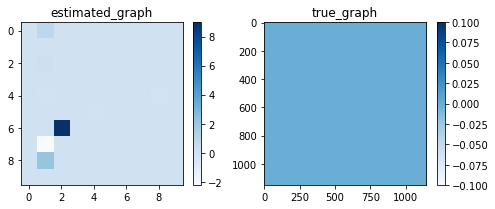

2022-04-18 13:16:41,790 INFO - __main__ - Thresholding.


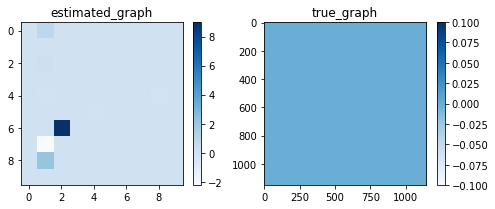

2022-04-18 13:16:42,178 INFO - __main__ - Results after thresholding by 0.0: {'fdr': 1.0, 'tpr': 0.0, 'fpr': 0.2222222222222222, 'shd': 10, 'pred_size': 10}


In [9]:
# Plot raw estimated graph
plot_estimated_graph(W_est, W_true, save_name='{}/raw_estimated_graph.png'.format(output_dir))

_logger.info('Thresholding.')
# Plot thresholded estimated graph
graph_thres = 0.0
copy_W_est = W_est
copy_W_est[np.abs(W_est) < graph_thres] = 0   # Thresholding
plot_estimated_graph(copy_W_est, W_true, save_name='{}/thresholded_estimated_graph.png'.format(output_dir))
results_thresholded = count_accuracy(W_true, W_est)
_logger.info('Results after thresholding by {}: {}'.format(graph_thres, results_thresholded))

In [10]:
end = time.time()

_logger.info('The time used to execute this is given below')
_logger.info(end - start)

2022-04-18 13:16:42,182 INFO - __main__ - The time used to execute this is given below
2022-04-18 13:16:42,183 INFO - __main__ - 1.9283032417297363


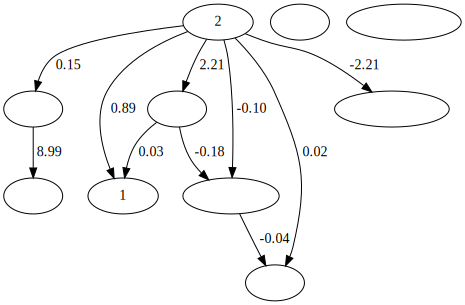

In [11]:
headers = ['震動1', '震動2', '電流', '壓力', '馬達溫度', '水溫', '電壓', '循環水流量', '異常', '異常點變化']
# Accelerometer1 震動1
# Accelerometer2 震動2
# Current 電流
# Pressure 壓力
# Temperature 馬達溫度
# Thermocouple 水溫
# Voltage 電壓
# RateRMS 循環水流量
# anomaly 異常
# changepoint 異常點變化

dot = make_dot(copy_W_est, labels=headers)
dot.format = 'png'

w_est_dag = dot.render('{}/w_est_dag'.format(output_dir))

dot

# # draw est dag
# from IPython.display import Image
# Image(w_est_dag) 

In [12]:
print(dot)

digraph {
	"震動1"
	"震動2"
	"電流"
	"壓力"
	"馬達溫度"
	"水溫"
	"電壓"
	"循環水流量"
	"異常"
	"異常點變化"
	"震動2" -> "震動1" [label=0.89]
	"異常" -> "震動1" [label=0.03]
	"震動2" -> "電流" [label=0.15]
	"震動2" -> "馬達溫度" [label=-0.10]
	"異常" -> "馬達溫度" [label=-0.18]
	"震動2" -> "水溫" [label=0.02]
	"馬達溫度" -> "水溫" [label=-0.04]
	"電流" -> "電壓" [label=8.99]
	"震動2" -> "循環水流量" [label=-2.21]
	"震動2" -> "異常" [label=2.21]
	{
		rank=same
	}
}



In [13]:
# draw true dag
# from IPython.display import Image
# Image(w_true_dag) 